> ### RIIAA 2.0 – Workshop
> **Deep Learning as a Service** <br>
> **Instructor:** [Rodolfo Ferro](https://rodolfoferro.xyz) <br>
> **Email:** <ferro@cimat.mx> <br>
> **Twitter:** <https://twitter.com/FerroRodolfo/> <br>
> **GitHub:** <https://github.com/RodolfoFerro/> <br>

# Iris Classification Problem

Along this notebook we'll explain how to use the power of cloud computing with Google Colab for a classical example –*The Iris Classification Problem*– using the popular [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

For this classification problem we will build a simple feed-forward full-connected artificial neural network.

The Python framework that we will be using is [Tensorflow 2.0](https://www.tensorflow.org) with the [Keras](https://keras.io/) module.


### Problem statement

Before we tackle the problem an ANN, let's understand what we'll be doing:

* If we feed our neural network with Iris data, the model should be able to determine what species it is.

> #### What do we need to do?
> Train a _Deep Learning_ model (in this case) using a known dataset: [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).
>
> Specifically, we are going to do the following:
> - Load the dataset
> - Preprocess the data
> - Build the model
> - Set hyperparameters
> - Train the model
> - Save and download the trained model
> - Predict data

## Installing dependencies

For our training we will be using Tensorflow 2.0, so we want to be sure it is installed on its latest version:

In [2]:
# Let's install Tensorflow 2.0:
!pip install -q tensorflow==2.0.0-rc0

# And verify that it is now in its latest version:
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-rc0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.0.0-rc0
2.13.0


## The Iris dataset

In [3]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/Iris_flower_data_set'
iframe = '<iframe src=' + url + ' width="100%" height=400></iframe>'
HTML(iframe)

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Importing the dataset

In [4]:
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# We will fix a random seed for reproducibility:
seed = 11
np.random.seed(seed)

In [5]:
# We now import the Iris dataset:
iris = load_iris()

# And set the features and labels vectors from it:
# Set x as 'data' from iris
x = iris.data
# Set y as 'target' from iris
y = iris.target
# Set names as 'target_names' from iris
names = iris.target_names
# Set feature_names as 'feature_names' from iris
feature_names = iris.feature_names

# We can load some elements to verify the contents in the dataset:
elements_to_display = [0,25,50,100]
for element in elements_to_display:
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Species: {names[element % 3]}")
    print()

Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: 0
  - Species: setosa

Element 25th:
  - Features: [5.  3.  1.6 0.2]
  - Target: 0
  - Species: versicolor

Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: 1
  - Species: virginica

Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: 2
  - Species: versicolor



## Preprocess dataset

The preprocess step results very important in many cases. For this case, we will just need to do a very simple transformation: a one hot encode process.

In [6]:
from tensorflow import keras

# One hot encode outputs:
y = keras.utils.to_categorical(y)

# Set global variables:
n_features = len(feature_names)
n_classes = names.shape[0]

# Let's checkout changes:
for element in elements_to_display:
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Species: {names[element % 3]}")
    print()


# Split the data set into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=seed)

Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: [1. 0. 0.]
  - Species: setosa

Element 25th:
  - Features: [5.  3.  1.6 0.2]
  - Target: [1. 0. 0.]
  - Species: versicolor

Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: [0. 1. 0.]
  - Species: virginica

Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: [0. 0. 1.]
  - Species: versicolor



## Let's talk about the model...

We will be using a very simple model, a feed-forward multi-layer perceptron.

### Let's create the model with Keras!

First of all, let's import what we'll use:

In [7]:
# Let's import our Keras stuff:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def iris_model(input_dim, output_dim, init_nodes=4, name='model'):
    """FF-MLP model for Iris classification problem."""

    # Create model:
    model = Sequential(name=name)
    # Add Dense -> init_nodes, input_dim=input_dim, activation='relu'
    model.add(Dense(init_nodes, input_dim=input_dim, activation='relu'))
    # Add Dense -> 2*init_nodes, activation='relu'
    model.add(Dense(2*init_nodes,activation='relu'))
    # Add Dense -> 3*init_nodes, activation='relu'
    model.add(Dense(3*init_nodes,activation='relu'))
    # Add Dense -> output_dim, activation='softmax'
    model.add(Dense(output_dim, activation='softmax'))

    # Compile model:
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

### Useful resources

- Sequential model: <https://keras.io/getting-started/sequential-model-guide/>
- Classifying the Iris Data Set with Keras: <https://janakiev.com/notebooks/keras-iris/>

### Building the model

In [8]:
# Let's build our model:
model = iris_model(input_dim=x.shape[1], output_dim=len(names))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 3)                 39        
                                                                 
Total params: 207 (828.00 Byte)
Trainable params: 207 (828.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In order to train the model, we first need to set its training hyperparameters.

In [10]:
# Set hyperparameters
epochs = 100
batch = 32

# Fit the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    verbose=True,
                    epochs=epochs, batch_size=batch)

Epoch 1/100
4/4 [==============================] - 6s 75ms/step - loss: 1.1052 - accuracy: 0.0000e+00 - val_loss: 1.1014 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1.1002 - accuracy: 0.0000e+00 - val_loss: 1.0972 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0952 - accuracy: 0.0000e+00 - val_loss: 1.0933 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0911 - accuracy: 0.0000e+00 - val_loss: 1.0896 - val_accuracy: 0.1333
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0872 - accuracy: 0.2095 - val_loss: 1.0861 - val_accuracy: 0.3111
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0832 - accuracy: 0.3429 - val_loss: 1.0834 - val_accuracy: 0.3111
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0803 - accuracy: 0.3429 - val_loss: 1.0807 - val_accuracy:

### Evaluating the results

In [11]:
# Final evaluation of the model:
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]}')

2/2 [==============================] - 0s 9ms/step - loss: 0.4262 - accuracy: 0.9778
Test accuracy: 0.9777777791023254


### Plot the training along the time

In [13]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

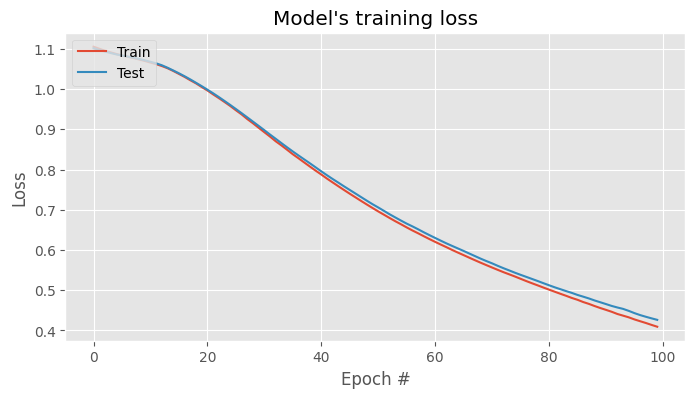

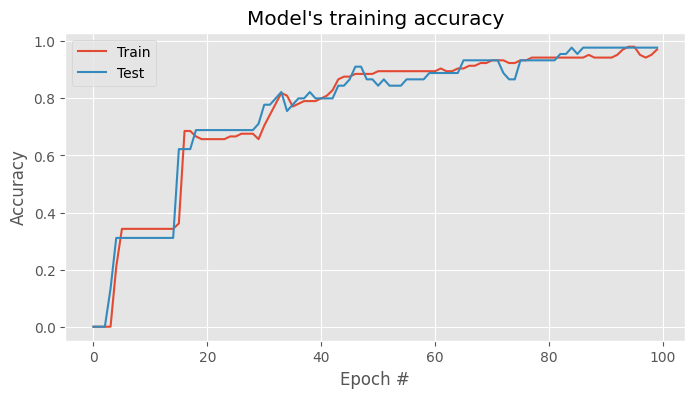

In [14]:
plot_loss(history)
plot_accuracy(history)

_How can we save these plots?_

## Saving a model

To save the trained model we will basically do two things:

1. Serialize the model into a JSON file, which will save the architecture of our model.
2. Serialize the weights into a HDF5 file, which will save all parameters of our model.

In [15]:
# Serialize model to JSON:
model_json = model.to_json()
with open("iris_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 (h5py needed):
model.save_weights("iris_model.h5")
print("Model saved to disk.")

Model saved to disk.


## Downloading a model

We just need to import the Google Colab module and download the specified files.

In [16]:
from google.colab import files

model_files = ['iris_model.json', 'iris_model.h5']
for file in model_files:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading a trained model
We will basically do three things:

1. Load the model from a JSON file.
2. Load the weights from a HDF5 file.
3. (Re)Compile the trained model.

In [17]:
# Load json and create model:
from tensorflow.keras.models import model_from_json

json_file = open('iris_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("iris_model.h5")
print("Model loaded from disk.")

Model loaded from disk.


In [18]:
# Evaluate loaded model on test data:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

score = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {score[1]}')

2/2 [==============================] - 0s 8ms/step - loss: 0.4262 - accuracy: 0.9778
Test accuracy: 0.9777777791023254


## Predicting from new data

Now that we have a trained model, how do we use it?

It is as simple as follows:

In [19]:
# Remembering some elements:
for element in elements_to_display:
    prediction_vector = model.predict(np.array([x[element]]))
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Scpecies: {names[np.argmax(y[element])]}")
    print(f"  - Predicted species: {names[np.argmax(prediction_vector)]}")
    print()

1/1 [==============================] - 0s 97ms/step
Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: [1. 0. 0.]
  - Scpecies: setosa
  - Predicted species: setosa

1/1 [==============================] - 0s 17ms/step
Element 25th:
  - Features: [5.  3.  1.6 0.2]
  - Target: [1. 0. 0.]
  - Scpecies: setosa
  - Predicted species: setosa

1/1 [==============================] - 0s 18ms/step
Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: [0. 1. 0.]
  - Scpecies: versicolor
  - Predicted species: versicolor

1/1 [==============================] - 0s 19ms/step
Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: [0. 0. 1.]
  - Scpecies: virginica
  - Predicted species: virginica

